In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve,auc
%matplotlib inline

In [2]:
iris = pd.read_csv('./data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


![image](https://i.postimg.cc/FzC0JtPg/iris.png)
![info](https://i.postimg.cc/L83LzZ08/pasted-image-0.png)

# Data Preprocessing
- Categorical Data

In [13]:
flower = pd.get_dummies(iris['Flower'])
data = pd.concat((flower,iris),axis=1)

In [16]:
data.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,1,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,0,0,4.9,3.0,1.4,0.2,Iris-setosa
2,1,0,0,4.7,3.2,1.3,0.2,Iris-setosa
3,1,0,0,4.6,3.1,1.5,0.2,Iris-setosa
4,1,0,0,5.0,3.6,1.4,0.2,Iris-setosa


**Considering two attributes**
- PetalLength
- Petal Width

In [172]:
df = data[['PetalLength','PetalWidth','Flower']]
df.head()

,PetalLength,PetalWidth,Flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


# visualizing data

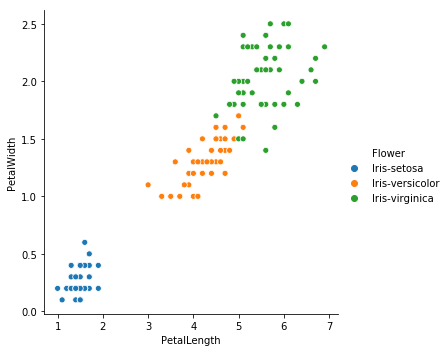

In [174]:
sns.relplot(x='PetalLength',y='PetalWidth',data=df,hue='Flower')

### Split data 
- independent 
- dependent

In [175]:
X= df.iloc[:,:-1] # independent
y = df.iloc[:,-1] # dependent

# Logistic Regression for multiclass
- Number of lines the seperate n classes = n - 1

**Method-1**

In [176]:
model = sm.MNLogit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.502085
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                 Flower   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Sat, 06 Apr 2019   Pseudo R-squ.:                  0.5430
Time:                        23:19:54   Log-Likelihood:                -75.313
converged:                       True   LL-Null:                       -164.79
                                        LLR p-value:                 1.380e-39
Flower=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
PetalLength               -5.5132      1.207     -4.568      0.000      -7.879     

**Method-2**

In [177]:
model_formula = sm.MNLogit.from_formula('Flower~PetalLength+PetalWidth-1',data=iris).fit()
print(model_formula.summary())

Optimization terminated successfully.
         Current function value: 0.502085
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Sat, 06 Apr 2019   Pseudo R-squ.:                  0.5430
Time:                        23:19:56   Log-Likelihood:                -75.313
converged:                       True   LL-Null:                       -164.79
                                        LLR p-value:                 1.380e-39
y=Flower[Iris-versicolor]       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
PetalLength                  -5.5132      1.207     -4.568      0.000      -7

**Two models**
1. Iris versicolor

Eq: $ln(s) = -5.5132*PetalLength + 21.7362* PetalWidth $
2. Iris Vignica

Eq: $ln(s) = -7.6121*PetalLength + 28.1132* PetalWidth $


model.predict(data[['PetalLength','PetalWidth']])

In [180]:
def drawline(i,p=0.5,colour = 'b'):
    inte = 0#model.params[i].Intercept
    pL =model.params[i].PetalLength
    pW = model.params[i].PetalWidth
    #np.log(p/(1-p)) = inte + pL*data['PetalLength'] + pW*data['PetalWidth']
    petallength = (-inte - pW*data['PetalWidth'] + np.log(p/(1-p)))/pL
    plt.plot(petallength,data['PetalWidth'])

In [181]:
def modelpredict(i,x1,x2):
    a = 0#model.params[i].Intercept
    b1 =model.params[i].PetalLength
    b2 = model.params[i].PetalWidth
    log_or = a + b1*x1 + b2*x2
    _or = np.exp(log_or)
    probability = _or/(1+_or)
    return probability



In [182]:
def threshold(probability,thresh=0.5):
    if probability <= thresh:
        return 1
    else:
        return 0

In [183]:
data['Flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# For Iris-Versicolor

In [167]:
y_set_versi = data['Flower'].replace(
    to_replace=['Iris-setosa','Iris-versicolor'
                ,'Iris-virginica'],value=[0,1,1])

In [184]:
y_prob = modelpredict(0,data['PetalLength'],data['PetalWidth'])
y_pred = y_prob.apply(threshold)
y_true = y_set_versi

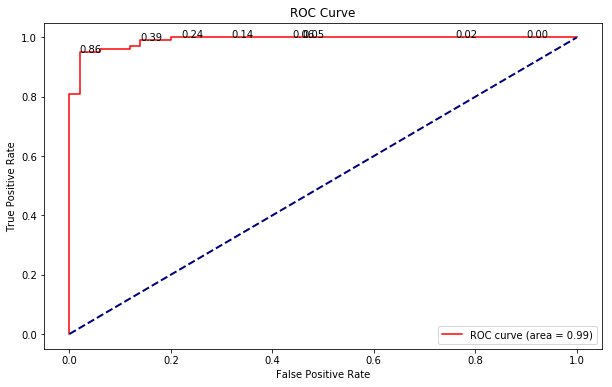

In [185]:
fpr,tpr,threshold = roc_curve(y_set_versi,y_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

**From ROC:**
- threshold *p-value* = 0.78

# For Versicolor

In [186]:
def threshold_versicolor(probability,thresh=0.5):
    if probability <= thresh:
        return 1
    else:
        return 0

In [187]:
y_set_veri = data['Flower'].replace(
    to_replace=['Iris-setosa','Iris-versicolor'
                ,'Iris-virginica'],value=[0,0,1])

In [188]:
y_prob = modelpredict(1,data['PetalLength'],data['PetalWidth'])
y_pred = y_prob.apply(threshold_versicolor)
y_true = y_set_veri

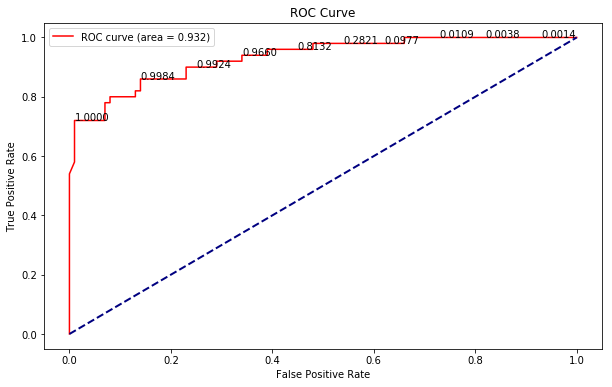

In [189]:
fpr,tpr,threshold = roc_curve(y_set_veri,y_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.4f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.3f)' % auc(fpr,tpr)])
plt.show()

**From ROC:**
- threshold *p-value* = 0.9984 

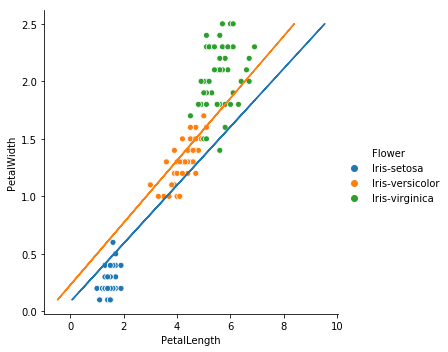

In [190]:
sns.relplot(x='PetalLength',y='PetalWidth',data=iris,hue='Flower')
drawline(0,0.86)
drawline(1,0.9984)